In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

In [4]:
# !unzip -qq haarcascades.zip
# !unzip -qq videos.zip

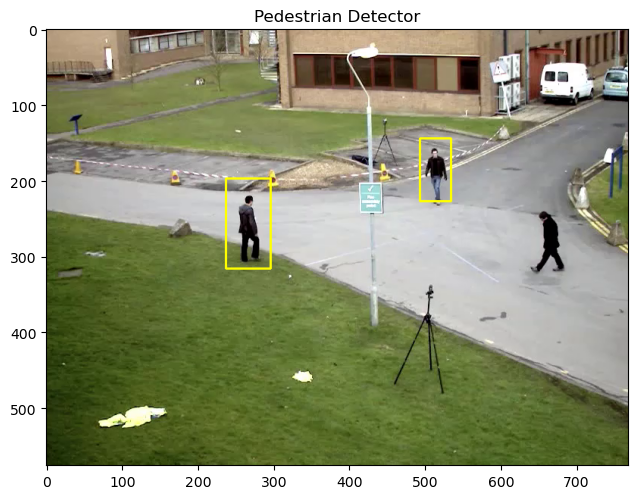

In [5]:
# Create our video capturing object
cap = cv2.VideoCapture('videos/walking.mp4')

# Load our body classifier
body_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Release our video capture
cap.release()   
imshow("Pedestrian Detector", frame)

**NOTE**: Takes around 1 minute to run.

We use cv2.VideoWriter to save the output as an AVI file.

```cv2.VideoWriter(video_output.avi, cv2.VideoWriter_fourcc('M','J','P','G'), FPS, (width, height))```

Formats can be:
- 'M','J','P','G' or MJPG
- MP4V
- X264
- avc1
- XVID

In [7]:
# Create our video capturing object
cap = cv2.VideoCapture('videos/walking.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

body_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    bodies = body_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Write the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()

#### for colab

In [ ]:
#!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

In [9]:
# from IPython.display import HTML
# from base64 import b64encode

# mp4 = open('videos/walking_output.avi','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
# HTML("""
# <video controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

#### **Vehicle Detection on Single Image**

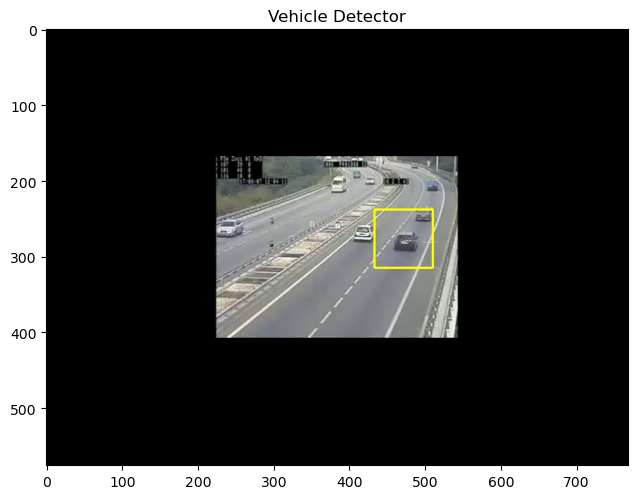

In [11]:
# Create our video capturing object
cap = cv2.VideoCapture('videos/cars.mp4')

# Load our vehicle classifier
vehicle_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  vehicles = vehicle_detector.detectMultiScale(gray, 1.4, 2)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in vehicles:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Release our video capture
cap.release()   
imshow("Vehicle Detector", frame)

In [12]:
# Create our video capturing object
cap = cv2.VideoCapture('videos/cars.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object. The output is stored in 'videos/cars_output.avi' file.
out = cv2.VideoWriter('videos/cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

vehicle_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

# Loop once video is successfully loaded
while True:
    ret, frame = cap.read()
    if ret: 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Pass frame to our body classifier
        vehicles = vehicle_detector.detectMultiScale(gray, 1.2, 3)

        # Extract bounding boxes for any bodies identified
        for (x, y, w, h) in vehicles:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

        # Write the frame into the file 'videos/cars_output.avi'
        out.write(frame)
    else:
        break

cap.release()
out.release()